## Group no. 5 : Nitish goyal 18510053 Rachana choudhary 18510063

# PH509 Lab 7

## Precession of the perhelion of Mercury

### Reference: Giordano and Nakanishi Section 4.3

### a
Simulate the motion of Mercury orbiting the Sun. Use the following force law with $\alpha = 0.01$

$$ F_G \approx \frac{G \, M_S \, M_M}{r^2} \, \big( 1 + \frac{\alpha}{r^2} \big)$$

Choose time step = $10^{-4}$ yr and reproduce Figure-$4.8$ of the given reference.

Initial conditions (position and velocity) should be chosen to match the semi-major axis of Mercury's orbit $a = 0.39$ `AU` and eccentricity $e = \sqrt{1 - b^2/a^2} = 0.206$. Verify that you end up with initial position $(x = 0.39, y=0)$ `AU` and initial velocity $(v_x = 0, v_y = 8.2)$ `AU/yr`. Plot the position of the Sun in your figure.


### b

Plot the precession of the axis of the Mercury's orbit as a function of time. Choose $\alpha = 8 \times 10^{-4} \, \text{AU}^2$  in the given equation of the force law and reproduce the Figure-$4.9$.

### c

Plot the precession rate of Mercury as a function of $\alpha$. Reproduce the Figure-$4.10$.

### d

Extrapolate Figure-$4.10$ to $\alpha = 1.1 \times 10^{-8}\, \texttt{AU}^2$ to get the actual precession rate of Mercury. Verify that it is $43$ arcseconds/ century. 



## (a)

In [527]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
from scipy.signal import find_peaks
from scipy import stats

In [528]:
a=0.39 #semi major axis (AU)
r1=0.47    #distance from mercury to sun
alpha=0.01
e=0.206   #eccentricity
b=np.sqrt(1-e**2)*a
print(b)


0.38163527667132663


In [529]:
def rhs1(Ik):
    xk,vxk,yk,vyk=Ik
    axk= (-4*np.pi**2*xk/(xk**2+yk**2)**(3/2))*(1+alpha/(xk**2+yk**2))
    ayk= (-4*np.pi**2*yk/(xk**2+yk**2)**(3/2))*(1+alpha/(xk**2+yk**2))
    return vxk,axk, vyk, ayk

In [530]:
def leapfrog(rhs, I0, T0, dt):

    N = int((T0[1]-T0[0])/dt) + 1
    x = np.zeros(N)
    y = np.zeros(N)                          
    vxhalf = np.zeros(N)
    vyhalf = np.zeros(N) 
    vx=np.zeros(N)
    vy=np.zeros(N)
    x[0], vx[0], y[0], vy[0]= I0             #initial conditions
    
    for k in range(N-1): 
        
        dydt = rhs([x[k], vx[k], y[k], vy[k]])
        
        axk = dydt[1]
        
        ayk = dydt[3]
        
        vxhalf[k] = vx[k] + .5 * dt * axk
        
        vyhalf[k] = vy[k] + .5 * dt * ayk
        
        x[k+1] = x[k] + dt * vxhalf[k]
        
        y[k+1] = y[k] + dt * vyhalf[k]
        
        dydt = rhs([x[k+1], vxhalf[k], y[k+1], vyhalf[k]])
        
        akxplus1 = dydt[1]
        
        akyplus1 = dydt[3]
        
        vx[k+1] = vxhalf[k] + 0.5*dt*akxplus1
        
        vy[k+1] = vyhalf[k] + 0.5*dt*akyplus1

        
        
    return x, vx, y, vy, np.linspace(T0[0],T0[1],  int((T0[1]-T0[0])/dt) + 1)


### Just trying orbit for v = 8.2

In [531]:
I0 = [0.47, 0, 0, 8.2]          #initial conditions
T0 = [0,1]
dt = 1/10000
sol1=leapfrog(rhs1, I0, T0, dt)     

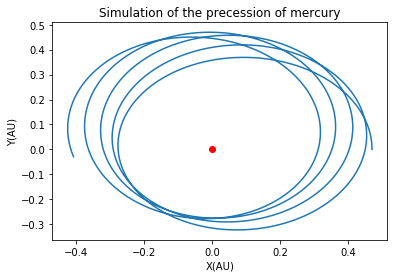

In [532]:
plt.plot(sol1[0], sol1[2])
plt.plot(0,0,'ro')
plt.xlabel('X(AU)')
plt.ylabel('Y(AU)')
plt.title("Simulation of the precession of mercury")
plt.show()

### Finding velocity of mercury at perihelion in order to have the given orbit

In [557]:
def bisectRoot(func, a, b, maxIter):
    
    x1=a
    x2=b
    i=0
    if func(x1)>0:
        temp=x2
        x2=x1
        x1=temp
    while i<maxIter:
        i=i+1
        x3=(x1+x2)/2
        
        if func(x3)>=0:
            x2=x3
        elif func(x3)<0: 
            x1=x3
       
        
    return (x3)

In [558]:
def rhs2(Ik):
    xk,vxk,yk,vyk=Ik
    axk= (-4*np.pi**2*xk/(xk**2+yk**2)**(3/2))
    ayk= (-4*np.pi**2*yk/(xk**2+yk**2)**(3/2))
    return vxk,axk, vyk, ayk

In [559]:
def vfinder(x):

    I0 = [.47, 0, 0,x]         # position space of earth for vi = 2*pi
    T0 = [0,1]
    dt = 1/10000
    sol=leapfrog(rhs2, I0, T0, dt)
    for i in range(len(sol[0])-1):
        if np.sign(sol[0][i]-.0803)==-1*np.sign(sol[0][i+1]-.0803):
            b1=sol[2][i]
            break
    return b1-b

In [560]:
v_mer = bisectRoot(vfinder,5,15,30)
print(v_mer)       # Velocity of mercury at its apehelion

8.170155314728618


In [561]:
alpha = .01
I0 = [0.47, 0, 0, v_mer]          #initial conditions
T0 = [0,1]
dt = 1/10000
sol2=leapfrog(rhs1, I0, T0, dt)     

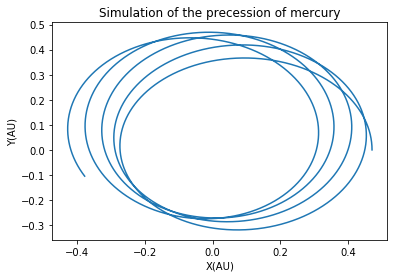

In [562]:
plt.plot(sol2[0], sol2[2])
plt.xlabel('X(AU)')
plt.ylabel('Y(AU)')
plt.title("Simulation of the precession of mercury")
plt.show()

###  (b) For alpha=0.0008

In [563]:
alpha = 0.0008
I0 = [0.47, 0, 0, v_mer]
T0 = [0,2]
sol3=leapfrog(rhs1, I0, T0, dt) 

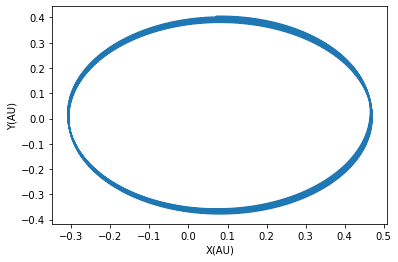

In [564]:
plt.plot(sol3[0], sol3[2])
plt.xlabel('X(AU)')
plt.ylabel('Y(AU)')
plt.show()                       # very small precession

In [570]:
def pre_rate(x):
    T=sol3[4]
    global alpha
    alpha=x
    I0 = [0.47, 0, 0, v_mer] 
    T0 = [0,2]    
    sol=leapfrog(rhs1, I0, T0, dt)
    r=np.sqrt(sol[0]**2+sol[2]**2)
    
    deri=np.gradient(r,T)
    deri0=np.where(np.diff(np.sign(deri)))[0]
    deri0 = np.insert(deri0,0,0)[::4]           # Slicing to 4 is done because in every cycle there are 4 points 
                                                #  where dr/dt=0
    

    theta=np.arctan(sol[2][deri0]/(sol[0][deri0]))*180/np.pi
    time=T[deri0]
    
    slope_0= stats.linregress(time, theta)[0]
    return slope_0,theta,time




In [571]:
slope,theta0,time = pre_rate(0.0008)

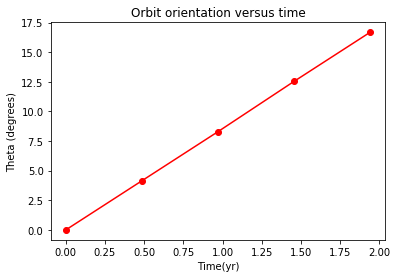

In [572]:
plt.plot(time,theta0,'ro-')
plt.xlabel('Time(yr)')
plt.ylabel('Theta (degrees)')
plt.title("Orbit orientation versus time")
plt.show()


In [573]:
print(slope)  # Precession rate at alpha = .0008

8.597773685284832


### (c) Precession rate w.r.t alpha

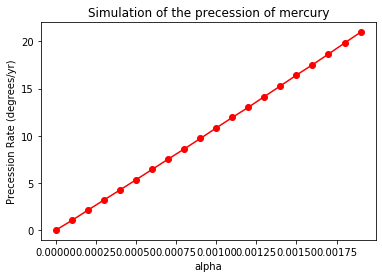

11047.169743322227 -0.15414723834679478


In [579]:
alpha_space = [.0001*i for i in range(0,20)]
thetadot=[]
alpha1=[]
slope_space=[]
for i in range(len(alpha_space)):
    slope_space.append(pre_rate(alpha_space[i])[0])
plt.plot(np.array(alpha_space),np.array(slope_space),'ro-')
plt.xlabel('alpha')
plt.ylabel('Precession Rate (degrees/yr)')
plt.title("Simulation of the precession of mercury")
plt.show()
slope1 = stats.linregress(np.array(alpha_space), np.array(slope_space))[0]
intercept = stats.linregress(np.array(alpha_space), np.array(slope_space))[1]
print(slope1,intercept) # change of Precession rate w.r.t 

### (d) For alpha=1.1 x 10^(-8)

In [581]:
alpha=1.1*10**-8
rate = slope1*alpha   # precession rate of mercury
print(rate*3600*100)  # Precession rate in arc sec / century       

43.746792183556025


### Note I ignore the zero error here as at alpha=0, The precession rate should be 0
As we decrease the dt the zero error will decrease i.e I take intercept to be equal to zero